The Placement of students is one of the most important objective of an educational

institution. Reputation and yearly admissions of an institution invariably depend on the

placements it provides it students with. That is why all the institutions, arduously, strive

to strengthen their placement department so as to improve their institution on a whole.

Any assistance in this particular area will have a positive impact on an institution’s ability

to place its students. This will always be helpful to both the students, as well as the

institution.



The main goal is to predict whether the student will be recruited in campus placements

or not based on the available factors in the dataset.



Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,

Feature Engineering, Model Building and Model Testing. Try out different machine

learning algorithms that’s best fit for the above case.



You can get the dataset from this link Campus Recruitment Prediction (Course Project) | Kaggle

1. Dataset Selection:

Choose a dataset that involves predicting a Categorical variable.
2. Data Preprocessing:

Load the dataset and perform exploratory data analysis (EDA) to understand its structure and content.
Handle missing values, if any.
Encode categorical features and the target variable.
Split the dataset into training and test sets (e.g., 70% training and 30% test).

3. Model Selection:
Choose at least four different machine learning models to train on your dataset. Examples include:
Logistic Regression
Decision Tree Classifier
Random Forest Classifier
Support Vector Machine (SVM)
k-Nearest Neighbors (k-NN)
Gradient Boosting Classifier
Any other classifiers you find suitable
Training the Models:

Train each selected model on the training data.
Ensure you properly tune the hyperparameters for each model to achieve the best performance.
Evaluating the Models:

Evaluate the performance of each model using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC (if applicable).
Use confusion matrices to visualize the performance of each model.
Voting Classifier:

Create a VotingClassifier that combines the predictions of your selected models.
Evaluate the performance of the voting classifier and compare it with the individual models.
Report:

Prepare a report that includes:
A brief description of the chosen dataset and the preprocessing steps you performed.
The models you selected and the rationale behind choosing them.
The evaluation metrics for each model and the voting classifier.
Confusion matrices and other visualizations to support your evaluation.
Your conclusions on which model performed the best and why.
Submission:
Submit your code in a Jupyter Notebook or Python script.
put the github link in the comment section of moodle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier



In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\prabh\Downloads\campus_data.csv")

# Display the first few rows
print(data.head())


   sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1       0  67.00   Others  91.00   Others  Commerce     58.00   
1      2       0  79.33  Central  78.33   Others   Science     77.48   
2      3       0  65.00  Central  68.00  Central      Arts     64.00   
3      4       0  56.00  Central  52.00  Central   Science     52.00   
4      5       0  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


The goal of the assignment is to make a model that predicts whether a student gets placed or not        
The Salary column tells the salary of placed students, thus it is redundant in helping model predict whether a student gets placed      
So lets are drop it

In [3]:
data=data.drop(['salary'],axis=1)

## Feature Descriptions

sl_no: anonymous id unique to a given employee      
gender: employee gender     
ssc_p: SSC is Secondary School Certificate (Class 10th). ssc_p is the percentage of marks secured in Class 10th.          
ssc_b: SSC Board. Binary feature.       
hsc_p: HSC is Higher Secondary Certificate (Class 12th). hsc_p is the percentage of marks secured in Class 12th.           
hsc_b: HSC Board. Binary feature.       
hsc_s: HSC Subject. Feature with three categories.      
degree_p: percentage of marks secured while acquiring the degree.       
degree_t: branch in which the degree was acquired. Feature with three categories.       
workex: Whether the employee has some work experience or not. Binary feature.       
etest_p: percentage of marks secured in the placement exam.     
specialisation: the specialization that an employee has. Binary feature.        
mba_p: percentage of marks secured by an employee while doing his MBA.      
status: whether the student was placed or not. Binary Feature. Target variable.     
salary: annual compensation at which an employee was hired.     

In [4]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


**Status is our Target Variable**

In [5]:

# Display dataset information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(2), object(7)
memory usage: 23.6+ KB
None


In [6]:
# Display summary statistics
print(data.describe())

            sl_no      gender       ssc_p       hsc_p    degree_p     etest_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000    0.353488   67.303395   66.333163   66.370186   72.100558   
std     62.209324    0.479168   10.827205   10.897509    7.358743   13.275956   
min      1.000000    0.000000   40.890000   37.000000   50.000000   50.000000   
25%     54.500000    0.000000   60.600000   60.900000   61.000000   60.000000   
50%    108.000000    0.000000   67.000000   65.000000   66.000000   71.000000   
75%    161.500000    1.000000   75.700000   73.000000   72.000000   83.500000   
max    215.000000    1.000000   89.400000   97.700000   91.000000   98.000000   

            mba_p  
count  215.000000  
mean    62.278186  
std      5.833385  
min     51.210000  
25%     57.945000  
50%     62.000000  
75%     66.255000  
max     77.890000  


In [7]:
# Display unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'sl_no': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
Unique values in 'gender': [0 1]
Unique values in 'ssc_p': [67.   79.33 65.   56.   85.8  55.   46.  

In [8]:

# Label Encoding
label_encoder = LabelEncoder()
binary_columns = ['ssc_b', 'hsc_b', 'workex', 'specialisation', 'status']
for column in binary_columns:
    data[column] = label_encoder.fit_transform(data[column])

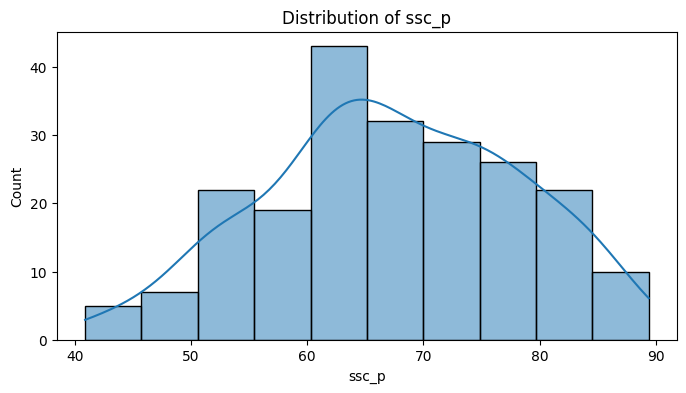

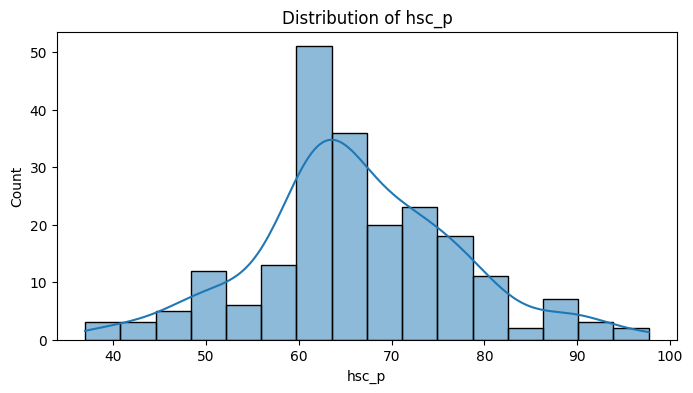

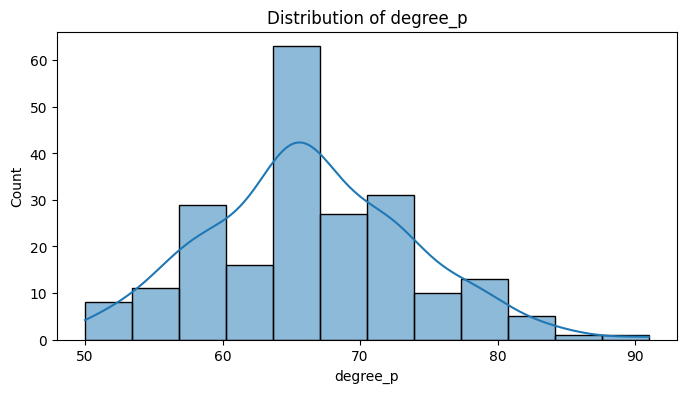

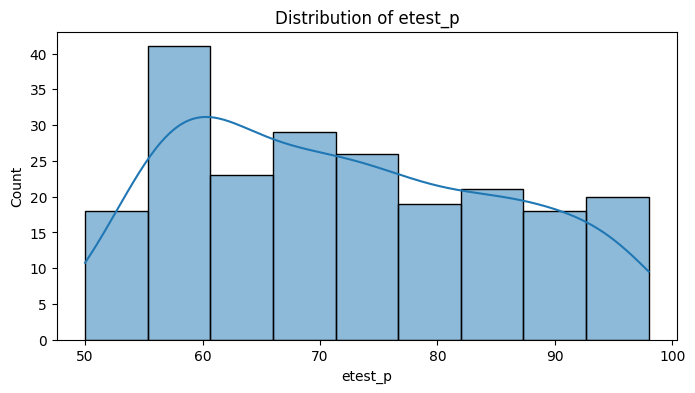

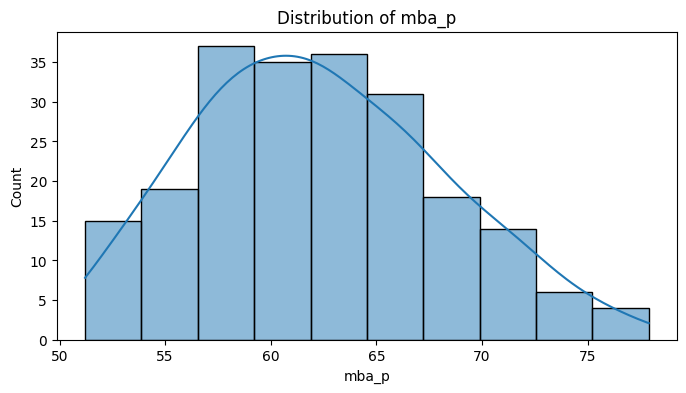

In [9]:
# Visualize the distribution of numerical features
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


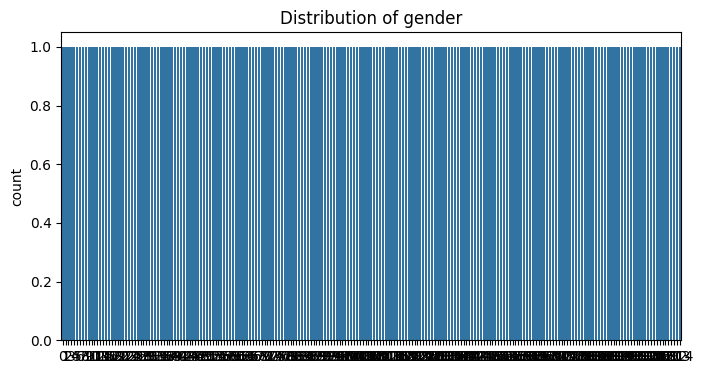

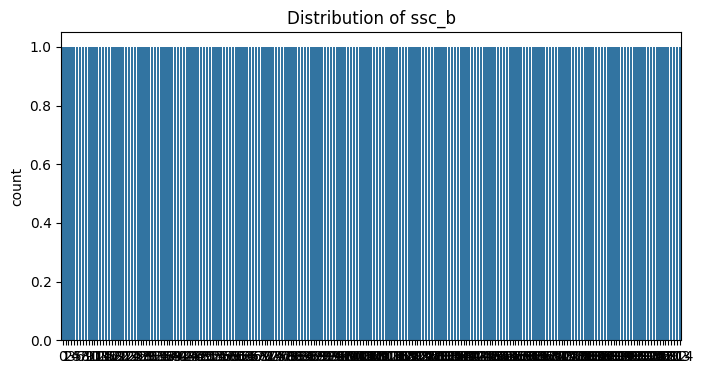

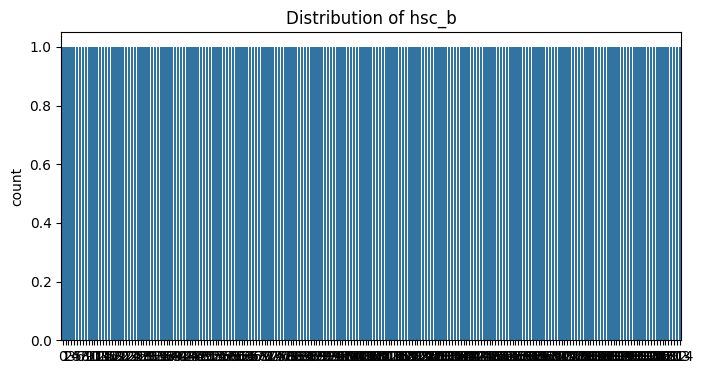

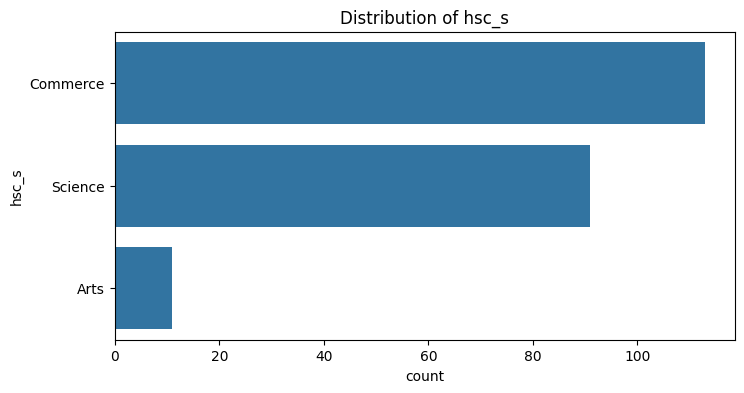

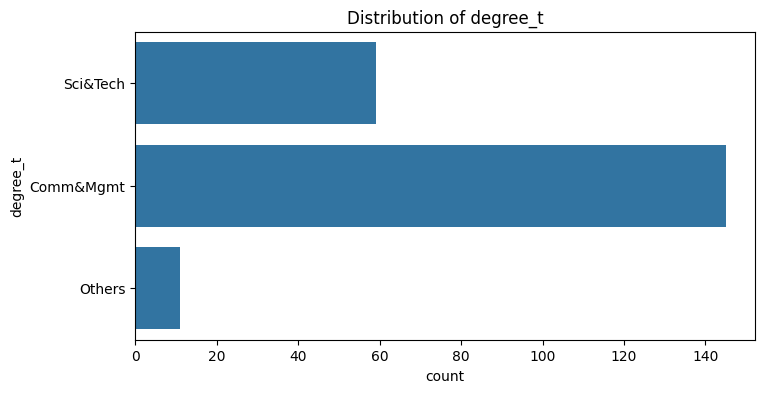

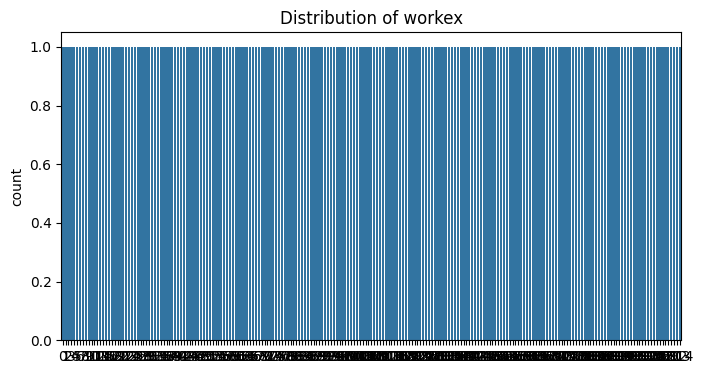

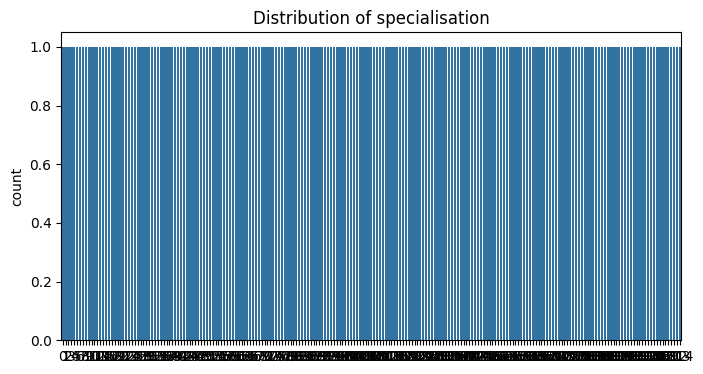

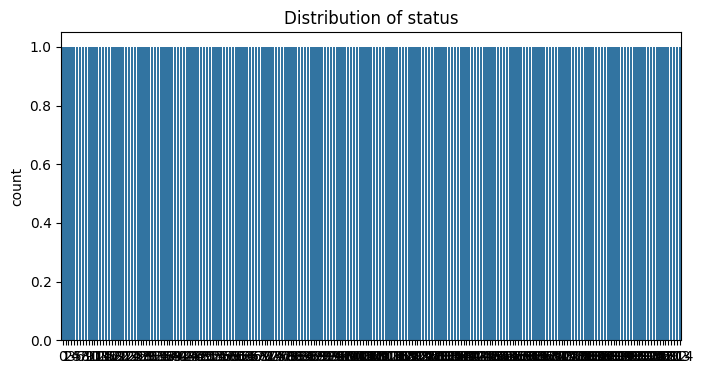

In [10]:

# Visualize the distribution of categorical features
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()


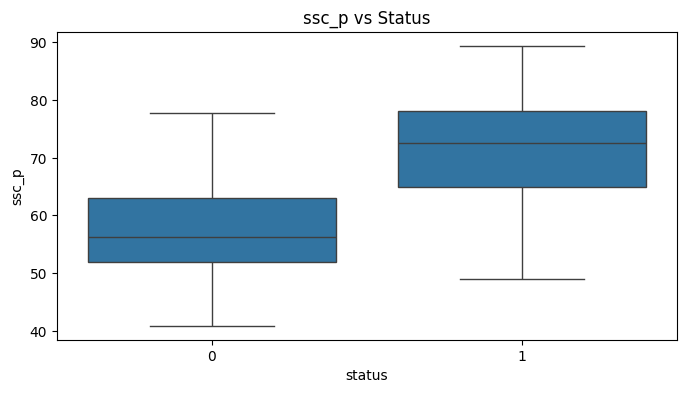

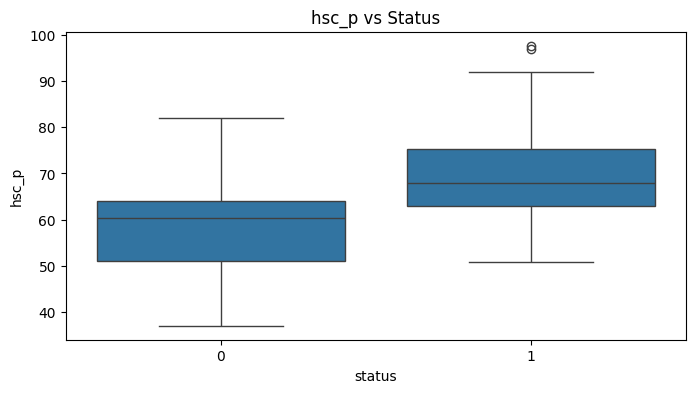

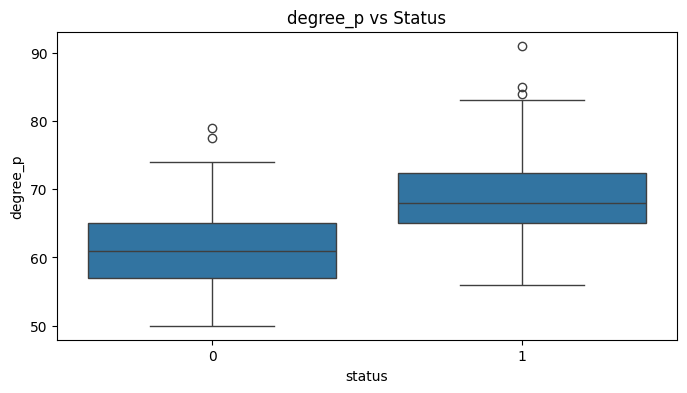

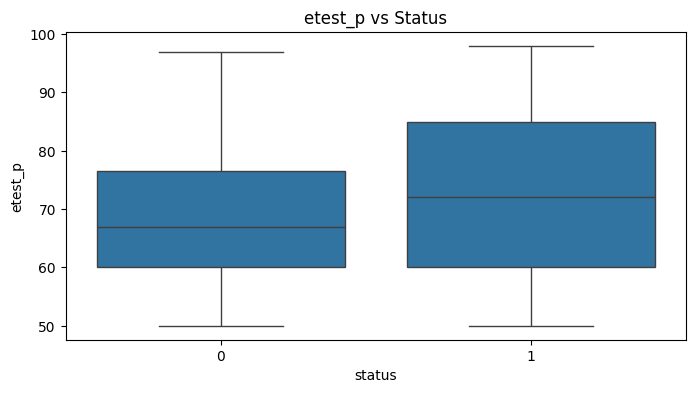

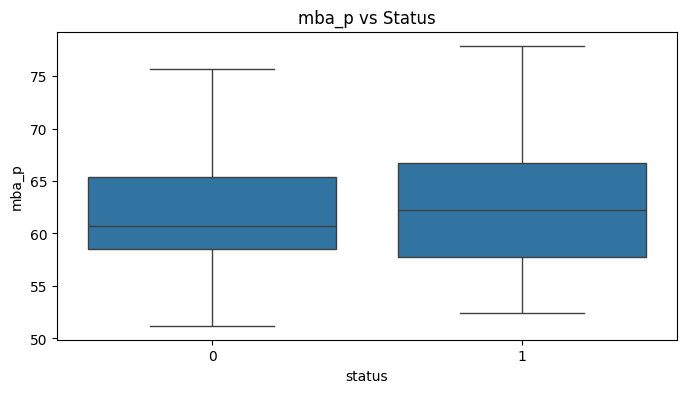

In [11]:

# Analyze the relationship between numerical features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='status', y=feature, data=data)
    plt.title(f'{feature} vs Status')
    plt.show()



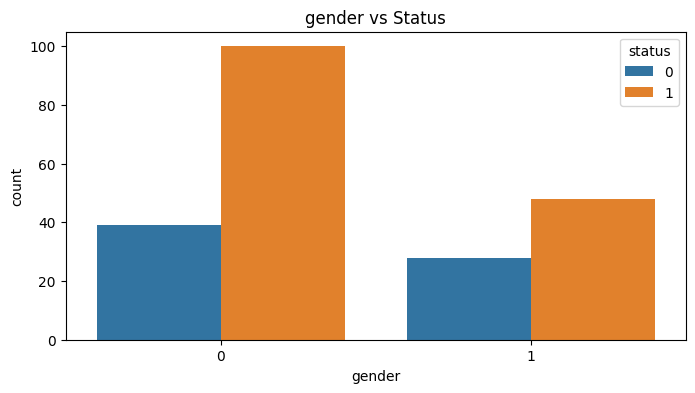

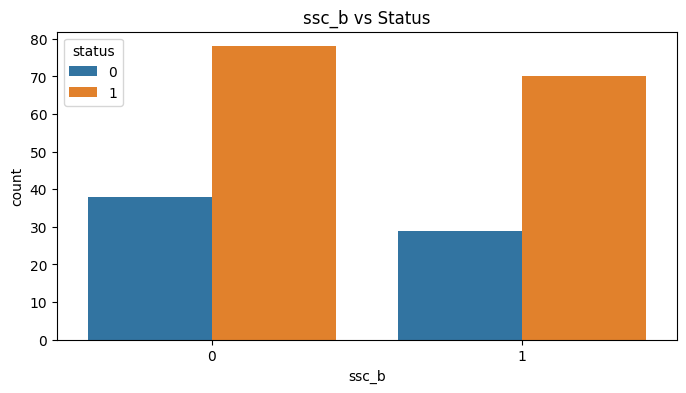

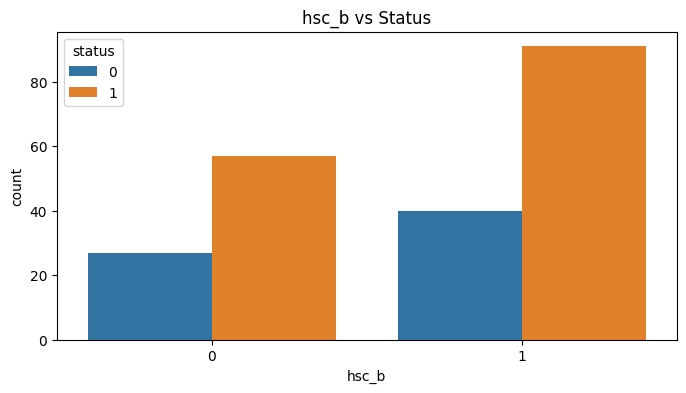

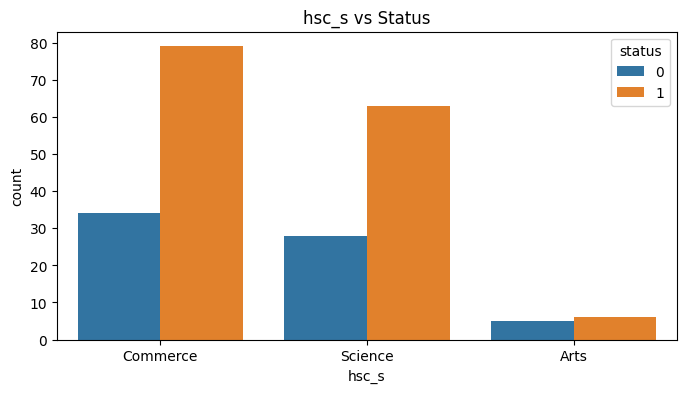

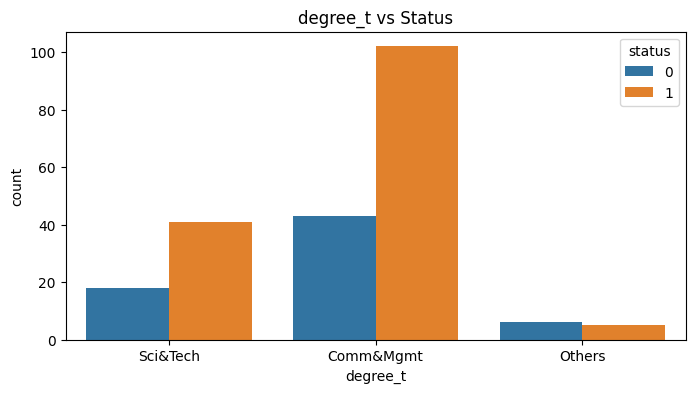

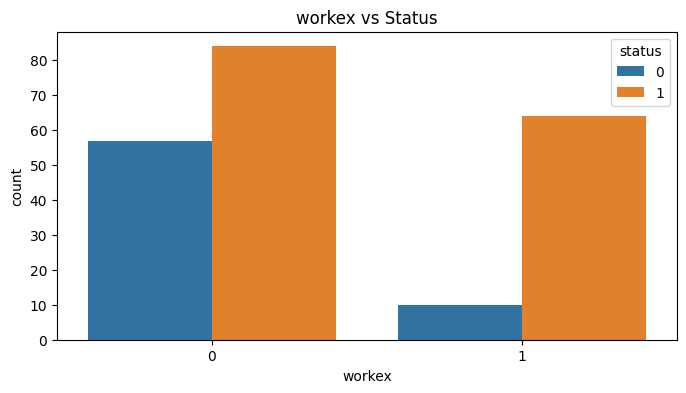

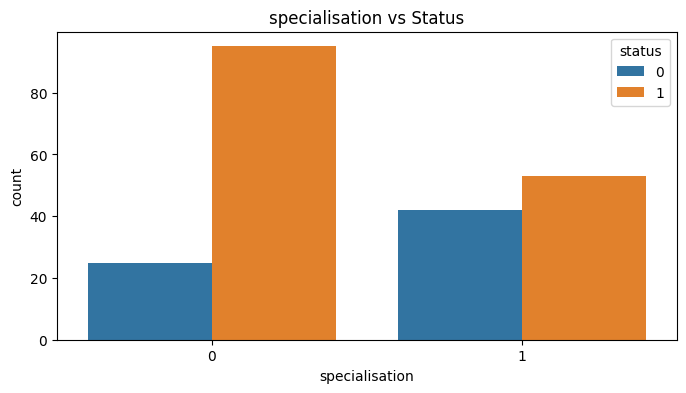

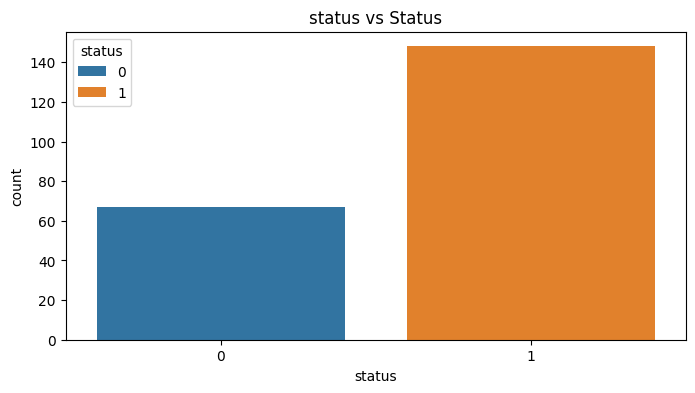

In [12]:
# Analyze the relationship between categorical features and the target variable
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='status', data=data)
    plt.title(f'{feature} vs Status')
    plt.show()



In [13]:
# One-Hot Encoding for 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t'
data = pd.get_dummies(data, columns=['hsc_s', 'degree_t'], drop_first=False)


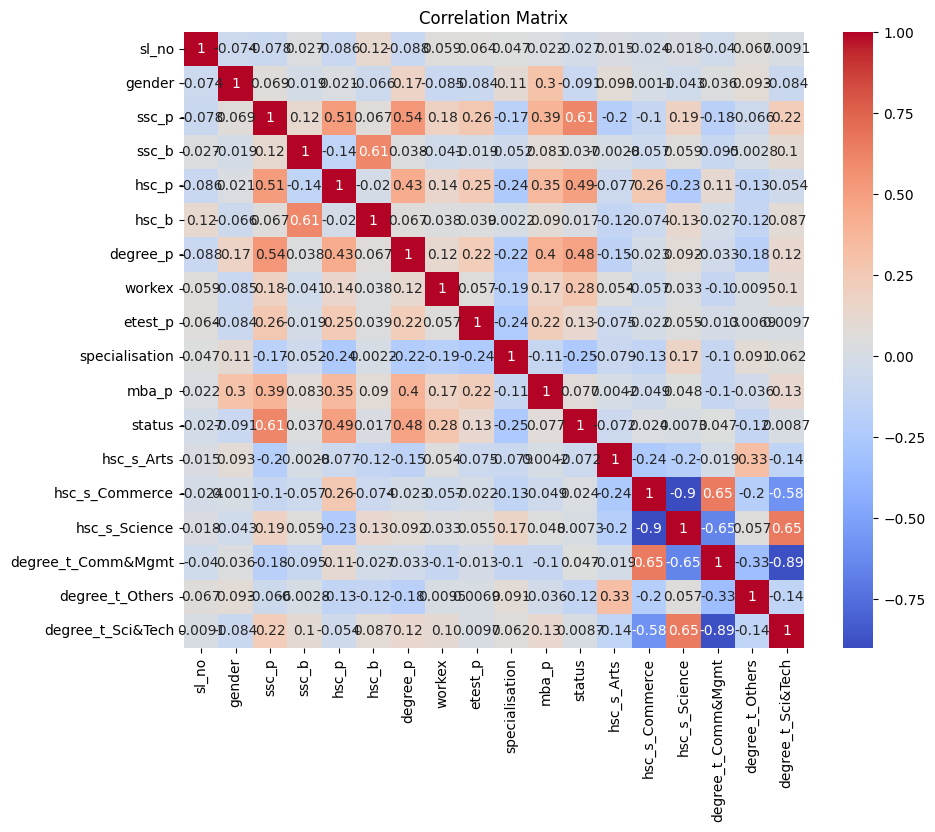

In [14]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Define features and target
X = data.drop('status', axis=1)
y = data['status']

# Split the dataset into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [17]:
# Initialize Logistic Regression with increased max_iter
log_reg = LogisticRegression(max_iter=5000)

# Define hyperparameters to tune
param_grid_log = {'C': [0.1, 1, 10]}

# GridSearchCV for hyperparameter tuning
grid_log = GridSearchCV(log_reg, param_grid_log, cv=5)
grid_log.fit(X_train_scaled, y_train)

# Best estimator
best_log_reg = grid_log.best_estimator_

In [18]:

# Initialize Decision Tree Classifier
dt_clf = DecisionTreeClassifier()

# Define hyperparameters to tune
param_grid_dt = {'max_depth': [3, 5, 7]}

# GridSearchCV for hyperparameter tuning
grid_dt = GridSearchCV(dt_clf, param_grid_dt, cv=5)
grid_dt.fit(X_train_scaled, y_train)

# Best estimator
best_dt_clf = grid_dt.best_estimator_


In [19]:
# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier()

# Define hyperparameters to tune
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [3, 5]}

# GridSearchCV for hyperparameter tuning
grid_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5)
grid_rf.fit(X_train_scaled, y_train)

# Best estimator
best_rf_clf = grid_rf.best_estimator_


In [20]:

# Initialize SVM
svm_clf = SVC(probability=True)

# Define hyperparameters to tune
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# GridSearchCV for hyperparameter tuning
grid_svm = GridSearchCV(svm_clf, param_grid_svm, cv=5)
grid_svm.fit(X_train_scaled, y_train)

# Best estimator
best_svm_clf = grid_svm.best_estimator_

In [21]:
# Initialize an empty list to store the scores
scores_list = []

# Function to evaluate model and store scores
def evaluate_model_and_store_scores(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    scores_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': confusion_mat
    })



In [22]:
# Create Voting Classifier
voting_clf_hard = VotingClassifier(estimators=[
    ('lr', best_log_reg),
    ('dt', best_dt_clf),
    ('rf', best_rf_clf),
    ('svm', best_svm_clf)
], voting='hard')

# Fit the Voting Classifier
voting_clf_hard.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1, max_iter=5000)),
                             ('dt', DecisionTreeClassifier(max_depth=5)),
                             ('rf', RandomForestClassifier(max_depth=5)),
                             ('svm',
                              SVC(C=10, kernel='linear', probability=True))])

In [23]:
# Evaluate and store scores for each model
evaluate_model_and_store_scores(best_log_reg, 'Logistic Regression', X_test_scaled, y_test)
evaluate_model_and_store_scores(best_dt_clf, 'Decision Tree Classifier', X_test_scaled, y_test)
evaluate_model_and_store_scores(best_rf_clf, 'Random Forest Classifier', X_test_scaled, y_test)
evaluate_model_and_store_scores(best_svm_clf, 'Support Vector Machine', X_test_scaled, y_test)
evaluate_model_and_store_scores(voting_clf_hard, 'Voting Classifier (Hard Voting)', X_test_scaled, y_test)

# Create a DataFrame from the scores list
scores_df = pd.DataFrame(scores_list)

# Display the scores DataFrame
scores_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Confusion Matrix
0,Logistic Regression,0.753846,0.759259,0.931818,0.836735,0.656385,"[[8, 13], [3, 41]]"
1,Decision Tree Classifier,0.846154,0.840000,0.954545,0.893617,0.786797,"[[13, 8], [2, 42]]"
2,Random Forest Classifier,0.784615,0.777778,0.954545,0.857143,0.691558,"[[9, 12], [2, 42]]"
3,Support Vector Machine,0.876923,0.891304,0.931818,0.911111,0.846861,"[[16, 5], [3, 41]]"
4,Voting Classifier (Hard Voting),0.815385,0.807692,0.954545,0.875000,0.739177,"[[11, 10], [2, 42]]"


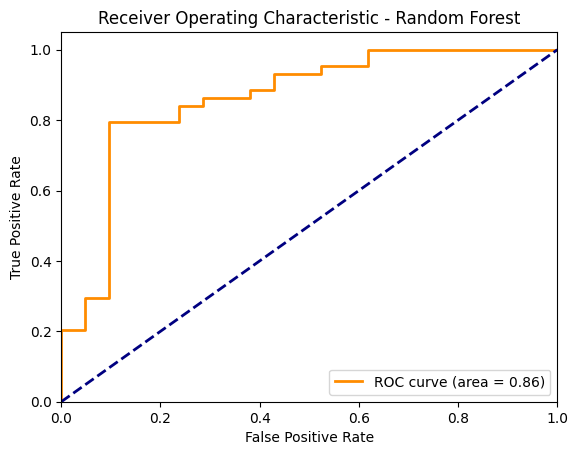

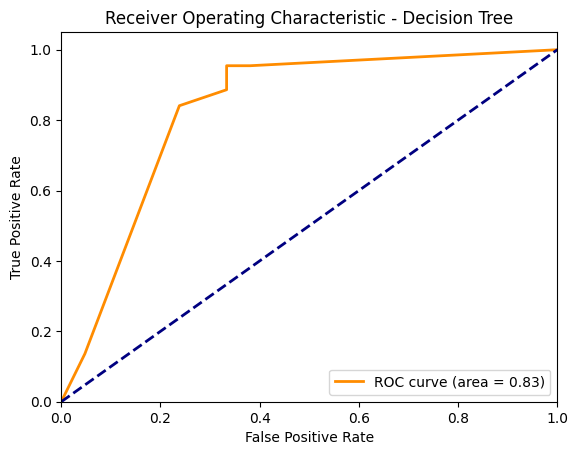

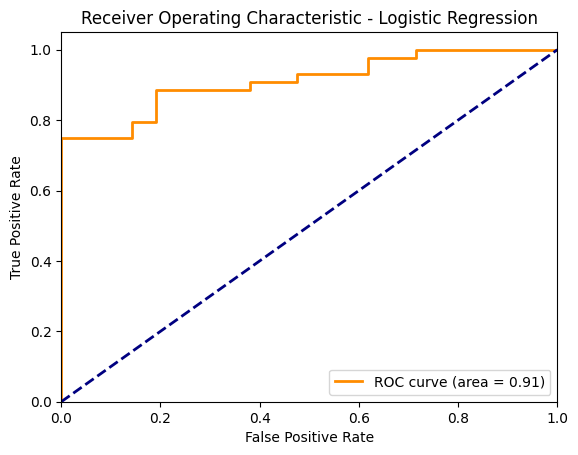

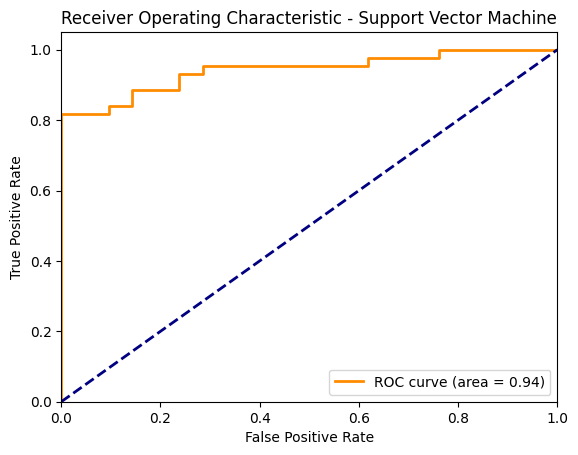

In [24]:
# Function to plot ROC curve
def plot_roc_curve(model, model_name, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for k-NN and XGBoost
plot_roc_curve(best_rf_clf, 'Random Forest', X_test_scaled, y_test)
plot_roc_curve(best_dt_clf, 'Decision Tree', X_test_scaled, y_test)
plot_roc_curve(best_log_reg, 'Logistic Regression', X_test_scaled, y_test)
plot_roc_curve(best_svm_clf, 'Support Vector Machine', X_test_scaled, y_test)
